In [1]:
!git clone https://github.com/s-chau03/Self_Learning_Car_Training_Data.git

Cloning into 'Self_Learning_Car_Training_Data'...
remote: Enumerating objects: 34593, done.
remote: Counting objects: 100% (1325/1325), done.
remote: Compressing objects: 100% (1325/1325), done.
remote: Total 34593 (delta 0), reused 1323 (delta 0), pack-reused 33268
Receiving objects: 100% (34593/34593), 436.21 MiB | 31.15 MiB/s, done.
Resolving deltas: 100% (27/27), done.
Checking out files: 100% (34306/34306), done.


In [3]:
!ls Self_Learning_Car_Training_Data/

driving_log.csv  IMG


In [4]:
!pip3 install imgaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
from sklearn.datasets import fetch_openml
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import random
from keras.utils import to_categorical
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.models import Model
import pickle
import pandas as pd
import ntpath
from sklearn.utils import shuffle 
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import tensorflow
import keras

In [9]:
print(tensorflow.__version__)
print(keras.__version__)

2.9.2
2.9.0


In [11]:
datadir = 'Self_Learning_Car_Training_Data'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', -1)
data.head()

<ipython-input-11-c9170ec66df1>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


center  \
0  C:\Users\shree\Desktop\Udemy\Self driving cars\training_data\IMG\center_2020_07_10_17_18_27_072.jpg   
1  C:\Users\shree\Desktop\Udemy\Self driving cars\training_data\IMG\center_2020_07_10_17_18_27_174.jpg   
2  C:\Users\shree\Desktop\Udemy\Self driving cars\training_data\IMG\center_2020_07_10_17_18_27_275.jpg   
3  C:\Users\shree\Desktop\Udemy\Self driving cars\training_data\IMG\center_2020_07_10_17_18_27_380.jpg   
4  C:\Users\shree\Desktop\Udemy\Self driving cars\training_data\IMG\center_2020_07_10_17_18_27_482.jpg   

                                                                                                 left  \
0   C:\Users\shree\Desktop\Udemy\Self driving cars\training_data\IMG\left_2020_07_10_17_18_27_072.jpg   
1   C:\Users\shree\Desktop\Udemy\Self driving cars\training_data\IMG\left_2020_07_10_17_18_27_174.jpg   
2   C:\Users\shree\Desktop\Udemy\Self driving cars\training_data\IMG\left_2020_07_10_17_18_27_275.jpg   
3   C:\Users\shree\Desktop\Udemy\Self driving cars\training_data\IMG\left_2020_07_10_17_18_27_380.jpg   
4   C:\Users\shree\Desktop\Udemy\Self driving cars\training_data\IMG\left_2020_07_10_17_18_27_482.jpg   

                                                                                                 right  \
0   C:\Users\shree\Desktop\Udemy\Self driving cars\training_data\IMG\right_2020_07_10_17_18_27_072.jpg   
1   C:\Users\shree\Desktop\Udemy\Self driving cars\training_data\IMG\right_2020_07_10_17_18_27_174.jpg   
2   C:\Users\shree\Desktop\Udemy\Self driving cars\training_data\IMG\right_2020_07_10_17_18_27_275.jpg   
3   C:\Users\shree\Desktop\Udemy\Self driving cars\training_data\IMG\right_2020_07_10_17_18_27_380.jpg   
4   C:\Users\shree\Desktop\Udemy\Self driving cars\training_data\IMG\right_2020_07_10_17_18_27_482.jpg   

   steering  throttle  reverse     speed  
0  0.0       0.0       0.0      0.000078  
1  0.0       0.0       0.0      0.000080  
2  0.0       0.0       0.0      0.000079  
3  0.0       0.0       0.0      0.000078  
4  0.0       0.0       0.0      0.000078

In [12]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

center                              left  \
0  center_2020_07_10_17_18_27_072.jpg  left_2020_07_10_17_18_27_072.jpg   
1  center_2020_07_10_17_18_27_174.jpg  left_2020_07_10_17_18_27_174.jpg   
2  center_2020_07_10_17_18_27_275.jpg  left_2020_07_10_17_18_27_275.jpg   
3  center_2020_07_10_17_18_27_380.jpg  left_2020_07_10_17_18_27_380.jpg   
4  center_2020_07_10_17_18_27_482.jpg  left_2020_07_10_17_18_27_482.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2020_07_10_17_18_27_072.jpg  0.0       0.0       0.0      0.000078  
1  right_2020_07_10_17_18_27_174.jpg  0.0       0.0       0.0      0.000080  
2  right_2020_07_10_17_18_27_275.jpg  0.0       0.0       0.0      0.000079  
3  right_2020_07_10_17_18_27_380.jpg  0.0       0.0       0.0      0.000078  
4  right_2020_07_10_17_18_27_482.jpg  0.0       0.0       0.0      0.000078

[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]
[-0.96 -0.88 -0.8  -0.72 -0.64 -0.56 -0.48 -0.4  -0.32 -0.24 -0.16 -0.08
  0.    0.08  0.16  0.24  0.32  0.4   0.48  0.56  0.64  0.72  0.8   0.88
  0.96]


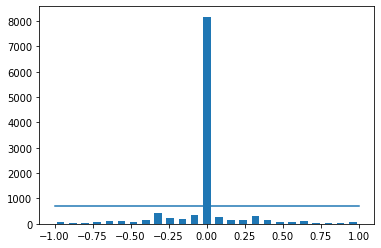

In [13]:
num_bins = 25
samples_per_bin = 700
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
print(bins)
print(center)
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

total_data: 11435
removed: 7469
remaining data: 3966


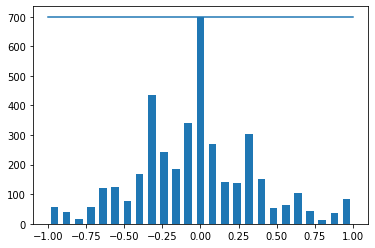

In [14]:
print('total_data:', len(data))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)
print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining data:', len(data))

hist, _ = np.histogram(data['steering'], num_bins)

plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [15]:
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings

image_paths, steerings = load_img_steering(datadir + '/IMG', data)

In [16]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size = 0.2, random_state = 0)
print(X_train.size)
print(X_valid.size)

3172
794


Text(0.5, 1.0, 'Validation Set')

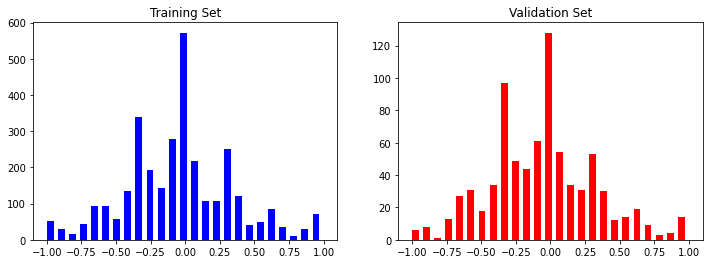

In [17]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].hist(y_train, bins = num_bins, width = 0.05, color = 'blue')
ax[0].set_title('Training Set')
ax[1].hist(y_valid, bins = num_bins, width = 0.05, color = 'red')
ax[1].set_title('Validation Set')

In [18]:
def zoom(image):
  zoom = iaa.Affine(scale = (1, 1.3))
  image = zoom.augment_image(image)
  return image

Text(0.5, 1.0, 'zoomed_image')

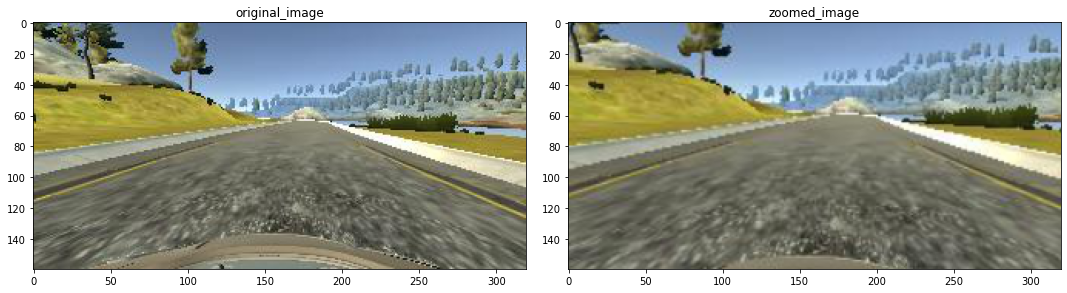

In [19]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

fig, axs = plt.subplots(1, 2, figsize = (15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('original_image')
axs[1].imshow(zoomed_image)
axs[1].set_title('zoomed_image')

In [20]:
def pan(image):
  pan = iaa.Affine(translate_percent={"x" : (-0.1, 0.1), "y" : (-0.1, 0.1)})
  image = pan.augment_image(image)
  return(image)

Text(0.5, 1.0, 'panned_image')

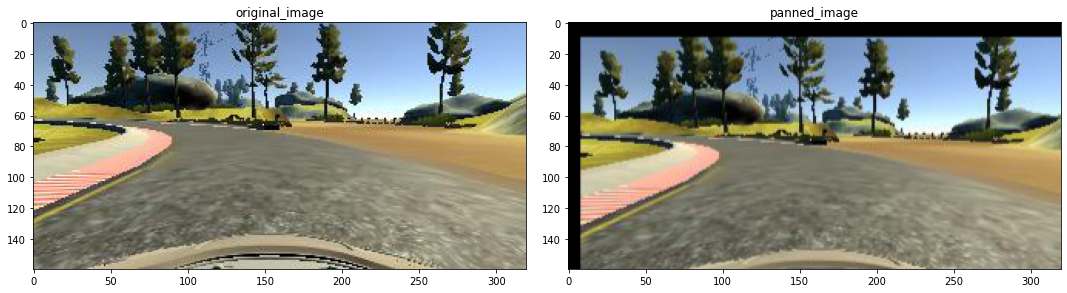

In [21]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)

fig, axs = plt.subplots(1, 2, figsize = (15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('original_image')
axs[1].imshow(panned_image)
axs[1].set_title('panned_image')

In [22]:
def img_random_brightness(image):
  brightness = iaa.Multiply(mul = (0.2, 1.2))
  image = brightness.augment_image(image)
  return image

Text(0.5, 1.0, 'brightness_altered_image')

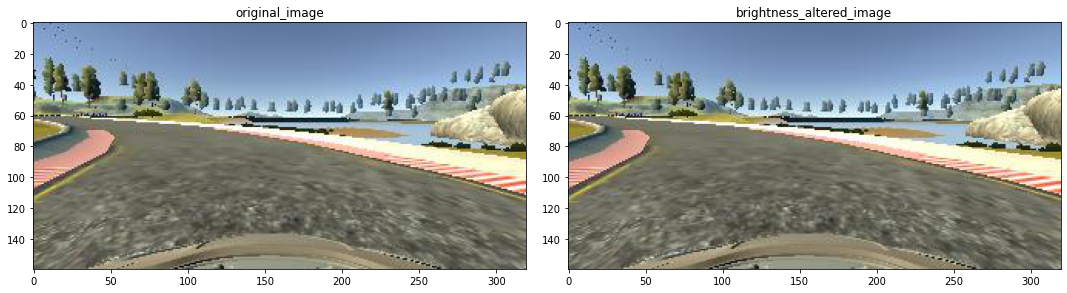

In [23]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)

fig, axs = plt.subplots(1, 2, figsize = (15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('original_image')
axs[1].imshow(brightness_altered_image)
axs[1].set_title('brightness_altered_image')

In [24]:
def img_random_flip(image, steering_angle):
  image = cv2.flip(image, 1)
  steering_angle = -steering_angle
  return image, steering_angle

Text(0.5, 1.0, 'brightness_altered_image Steering_angle = 0.37109369999999997')

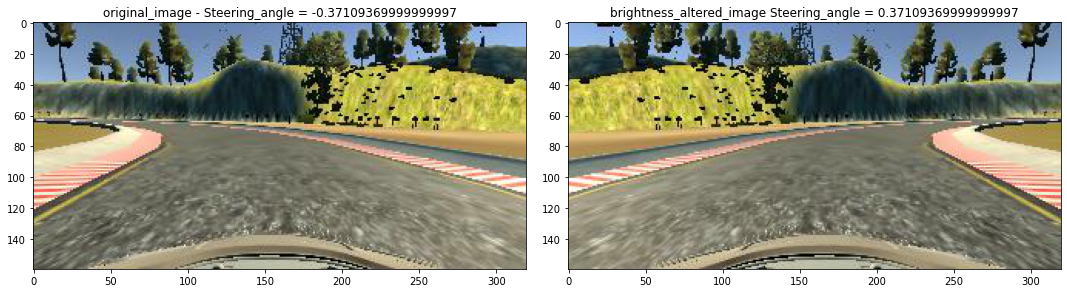

In [ ]:
random_index = random.randint(0, 1000)
image = image_paths[random_index]
steering_angle = steerings[random_index]

original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)

fig, axs = plt.subplots(1, 2, figsize = (15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('original_image - ' + 'Steering_angle = ' + str(steering_angle))
axs[1].imshow(flipped_image)
axs[1].set_title('brightness_altered_image ' + 'Steering_angle = ' + str(flipped_steering_angle))

In [25]:
#applying augmentation to only 50% data. If we apply to all the original image we looses the original form of training data
def random_augment(image, steering_angle):
  image = mpimg.imread(image)
  if np.random.rand() < 0.5:
    image = pan(image)
  if np.random.rand() < 0.5:
    image = zoom(image)
  if np.random.rand() < 0.5:
    image = img_random_brightness(image)
  if np.random.rand() < 0.5:
    image, steering_angle = img_random_flip(image, steering_angle)
  return image, steering_angle

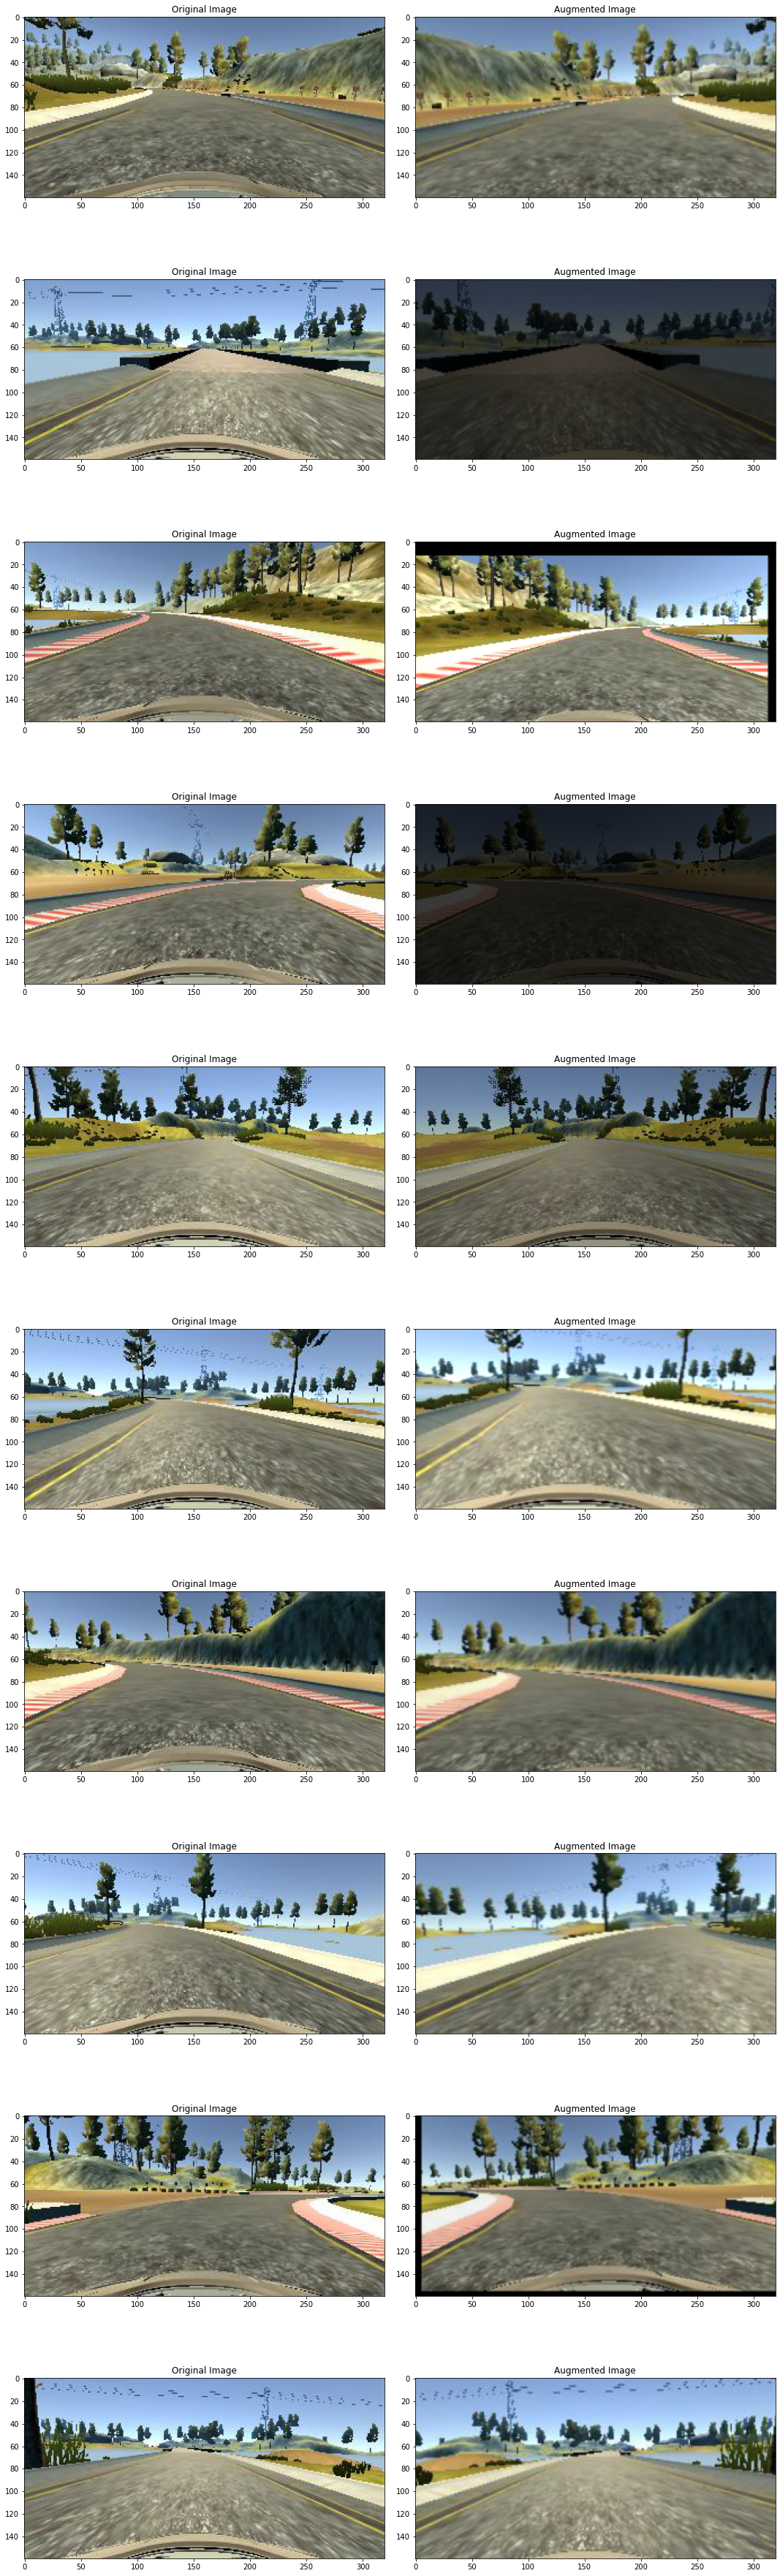

In [26]:
ncol = 2
nrow = 10
fig, axs = plt.subplots(nrow, ncol, figsize = (15,50))
fig.tight_layout()

for i in range(10):
  randnum = np.random.randint(0, len(image_paths)-1)
  random_image = image_paths[randnum]
  random_steering = steerings[randnum]
  
  original_image = mpimg.imread(random_image)
  augmented_image, steering = random_augment(random_image, random_steering)

  axs[i][0].imshow(original_image)
  axs[i][0].set_title('Original Image')

  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title('Augmented Image')

In [27]:
def img_preprocessing(img):
  img = img[60:135,:,:]
  img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img, (3,3), 0)
  img = cv2.resize(img, (200, 66))
  img = img/255
  return img

In [28]:
"""image = image_paths[10]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocessing(image)

fig, ax = plt.subplots(1,2, figsize=(15,10))
ax[0].imshow(original_image)
ax[0].set_title('Original Image')
ax[1].imshow(preprocessed_image)
ax[1].set_title('Preprocessed Image')
"""

"image = image_paths[10]\noriginal_image = mpimg.imread(image)\npreprocessed_image = img_preprocessing(image)\n\nfig, ax = plt.subplots(1,2, figsize=(15,10))\nax[0].imshow(original_image)\nax[0].set_title('Original Image')\nax[1].imshow(preprocessed_image)\nax[1].set_title('Preprocessed Image')\n"

In [29]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
  while True:
    batch_img = []
    batch_steering = []
    for i in range(batch_size):
      random_index = np.random.randint(0, len(image_paths)-1)
      if istraining:
        im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]
      im = img_preprocessing(im)
      batch_img.append(im)
      batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering))

Text(0.5, 1.0, 'Non-Augmented Validation Image')

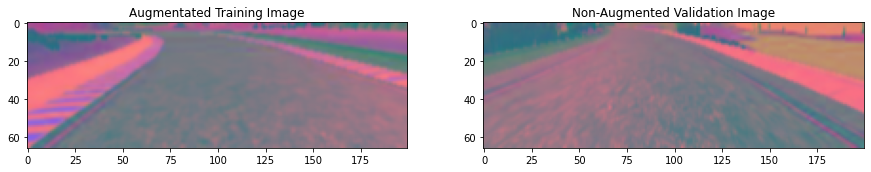

In [30]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))

fig, ax = plt.subplots(1,2, figsize=(15,10))
ax[0].imshow(x_train_gen[0])
ax[0].set_title('Augmentated Training Image')
ax[1].imshow(x_valid_gen[0])
ax[1].set_title('Non-Augmented Validation Image')

In [ ]:
#X_train = np.array(list(map(img_preprocessing, X_train)))
#X_valid = np.array(list(map(img_preprocessing, X_valid)))

In [ ]:
#plt.imshow(X_train[random.randint(0, len(X_train)-1)])
#plt.axis('off')
#print(X_train.shape)

In [31]:
def nvidia_model():
  model = Sequential()
  model.add(Conv2D(24, kernel_size=(5,5), strides=(2,2), input_shape = (66, 200, 3), activation='elu'))
  model.add(Conv2D(36, kernel_size=(5,5), strides=(2,2), activation='elu'))
  model.add(Conv2D(48, kernel_size=(5,5), strides=(2,2), activation='elu'))
  #model.add(Dropout(0.5))

  model.add(Conv2D(64, kernel_size=(3,3), activation='elu'))
  model.add(Conv2D(64, kernel_size=(3,3), activation='elu'))
  #model.add(Dropout(0.5))
  
  model.add(Flatten())

  model.add(Dense(100, activation='elu'))
  #model.add(Dropout(0.5))
  
  model.add(Dense(50, activation='elu'))
  #model.add(Dropout(0.5))

  model.add(Dense(10, activation='elu'))
  #model.add(Dropout(0.5))

  model.add(Dense(1))

  model.compile(optimizer = Adam(learning_rate=0.0001), loss = 'mse')
  return model

In [32]:
model = nvidia_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 100)               1

In [33]:
h = model.fit_generator(batch_generator(X_train, y_train, 100, 1),
                        steps_per_epoch=100,
                        epochs = 12,
                        validation_data= batch_generator(X_valid, y_valid, 100, 0), 
                        validation_steps=200,
                        shuffle=1,
                        verbose=1)

<ipython-input-33-115b913bba99>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  h = model.fit_generator(batch_generator(X_train, y_train, 100, 1),


Epoch 1/12
100/100 [==============================] - 189s 2s/step - loss: 0.1387 - val_loss: 0.1124
Epoch 2/12
100/100 [==============================] - 187s 2s/step - loss: 0.1302 - val_loss: 0.0955
Epoch 3/12
100/100 [==============================] - 202s 2s/step - loss: 0.1168 - val_loss: 0.0882
Epoch 4/12
100/100 [==============================] - 184s 2s/step - loss: 0.1102 - val_loss: 0.0906
Epoch 5/12
100/100 [==============================] - 182s 2s/step - loss: 0.1065 - val_loss: 0.0794
Epoch 6/12
100/100 [==============================] - 183s 2s/step - loss: 0.1060 - val_loss: 0.0783
Epoch 7/12
100/100 [==============================] - 183s 2s/step - loss: 0.1000 - val_loss: 0.0775
Epoch 8/12
100/100 [==============================] - 183s 2s/step - loss: 0.0998 - val_loss: 0.0797
Epoch 9/12
100/100 [==============================] - 183s 2s/step - loss: 0.0982 - val_loss: 0.0786
Epoch 10/12
100/100 [==============================] - 181s 2s/step - loss: 0.0964 - val_lo

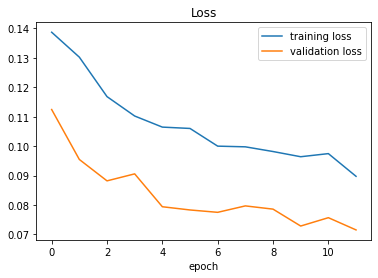

In [34]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['training loss', 'validation loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.show()

In [35]:
model.save('model_new.h5')

In [36]:
from google.colab import files
files.download('model_new.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>